In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sas

In [2]:
FTrial = pd.read_csv('D:\\Data Science\\git projects\\freemium-ab-testing\\data\\test_trial_results_numMap.csv')

In [3]:
FTrial = FTrial.drop('Unnamed: 0', axis=1, inplace=False)
FTrial.head()

,user_id,date,source,device,payee,browser,sex,age,industry_code,trial
0,176,20170104,2,2,1,1,2,31,11,0
1,976,20170105,1,2,1,1,2,41,11,0
2,4396,20170107,2,2,1,1,1,49,8,0
3,4495,20170103,3,2,1,1,1,35,5,1
4,5418,20170107,2,2,1,5,2,43,11,0


In [4]:
FTrial.tail(5)

,user_id,date,source,device,payee,browser,sex,age,industry_code,trial
165172,99998241,20170109,2,1,1,2,2,30,2,0
165173,99998313,20170107,1,2,1,1,2,47,10,0
165174,99999152,20170108,3,2,1,1,2,39,11,0
165175,99999608,20170110,3,2,1,1,2,35,8,0
165176,99999937,20170108,2,1,1,4,2,41,11,0


In [5]:
FTrial.shape

(165177, 10)

In [6]:
FTrial.columns

Index(['user_id', 'date', 'source', 'device', 'payee', 'browser', 'sex', 'age',
       'industry_code', 'trial'],
      dtype='object')

In [7]:
FTrial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165177 entries, 0 to 165176
Data columns (total 10 columns):
user_id          165177 non-null int64
date             165177 non-null int64
source           165177 non-null int64
device           165177 non-null int64
payee            165177 non-null int64
browser          165177 non-null int64
sex              165177 non-null int64
age              165177 non-null int64
industry_code    165177 non-null int64
trial            165177 non-null int64
dtypes: int64(10)
memory usage: 12.6 MB


In [8]:
# check if data is balanced or not?
FTrial['trial'].value_counts()

0    157981
1      7196
Name: trial, dtype: int64

In [9]:
FTrial['trial'].value_counts(normalize=True)

0    0.956435
1    0.043565
Name: trial, dtype: float64

# Fix Imbalance data

In [10]:
# Split into training/test set

from sklearn.model_selection import train_test_split

X = FTrial[['user_id', 'date', 'source', 'device', 'payee', 'browser', 'sex', 'age',
       'industry_code']]
y = FTrial[['trial']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [11]:
target_count = y_train.trial.value_counts(normalize=True)
target_count

0    0.956433
1    0.043567
Name: trial, dtype: float64

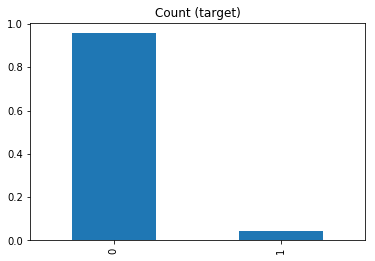

In [12]:
target_count.plot(kind='bar', title='Count (target)')

In [ ]:
!pip install xgboost

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 95.64%


In [14]:
# with just 1 input feature - should reduce accuracy

model = XGBClassifier()
model.fit(X_train[['browser']], y_train)
y_pred = model.predict(X_test[['browser']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 95.64%


In [15]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[31597     0]
 [ 1439     0]]


In [16]:
# Class count
count_class_0, count_class_1 = y_train.trial.value_counts()

# Divide by class
df_class_0 = y_train[y_train['trial'] == 0]
df_class_1 = y_train[y_train['trial'] == 1]

In [17]:
y_train.trial.value_counts()

0    126384
1      5757
Name: trial, dtype: int64

# Random under-sampling

Random under-sampling:
1    5757
0    5757
Name: trial, dtype: int64


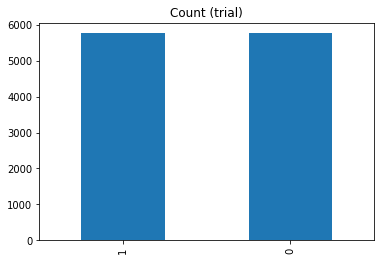

In [18]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.trial.value_counts())

df_test_under.trial.value_counts().plot(kind='bar', title='Count (trial)')

In [19]:
df_test_under.tail()

,trial
44186,1
66978,1
23728,1
73521,1
28030,1


# Python imbalanced-learn module

In [ ]:
!pip install imblearn

# Random under-sampling and over-sampling with imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, _ = rus.fit_sample(X, y)

# Other methods to handle imbalance data as per: https://elitedatascience.com/imbalanced-classes

# 1. Up-sample Minority Class

First, we'll import the resampling module from Scikit-Learn

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

1) First, we'll separate observations from each class into different DataFrames.
2) Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
3) Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

Here's the code:

In [20]:
training_set = pd.concat([X_train, y_train], axis=1)

In [21]:
training_set.shape

(132141, 10)

In [24]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = training_set[training_set.trial==0]
df_minority = training_set[training_set.trial==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=126384,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.trial.value_counts()

1    126384
0    126384
Name: trial, dtype: int64

In [25]:
df_upsampled.shape

(252768, 10)

As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.

Let's train another model using Logistic Regression, this time on the balanced dataset:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target variable (y)
y = df_upsampled.trial
X = df_upsampled.drop('trial', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on test set
pred_y_1 = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]
0.500605400169512


# 2. Down-sample Majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

1) First, we'll separate observations from each class into different DataFrames.

2) Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.

3) Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

Here's the code:

In [27]:
# Separate majority and minority classes
df_majority = training_set[training_set.trial==0]
df_minority = training_set[training_set.trial==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5757,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.trial.value_counts()

1    5757
0    5757
Name: trial, dtype: int64

This time, the new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1.

Again, let's train a model using Logistic Regression:

In [28]:
# Separate input features (X) and target variable (y)
y = df_downsampled.trial
X = df_downsampled.drop('trial', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on test set
pred_y_2 = clf_2.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_2) )

[0 1]
0.5002421600678049


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 3. Change Your Performance Metric

In [29]:
from sklearn.metrics import roc_auc_score

# down sampled model
prob_y_2 = clf_2.predict_proba(X)   # Predict class probabilities
prob_y_2 = [p[1] for p in prob_y_2]  # Keep only the positive class
print( roc_auc_score(y, prob_y_2) )

# up sampled model
prob_y_1 = clf_1.predict_proba(X)   # Predict class probabilities
prob_y_1 = [p[1] for p in prob_y_1]  # Keep only the positive class
print( roc_auc_score(y, prob_y_1) )

0.5011248059887308
0.5011248059887308


Note: if you got an AUROC of 0.47, it just means you need to invert the predictions because Scikit-Learn is misinterpreting the positive class. AUROC should be >= 0.5

# 4. Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM. Let's train a model using Penalized-SVM on the original imbalanced dataset:

In [ ]:
from sklearn.svm import SVC

# Train model
clf_3 = SVC(kernel='rbf', 
            class_weight='balanced', # penalize mistakes on the minority class by an amount proportional to how under-represented it
            probability=True)  # enable probability estimates for SVM algorithms
 
clf_3.fit(X_train, y_train)
 
# Predict on test set
pred_y_3 = clf_3.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X_train)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_train, prob_y_3) )

# 5. Use Tree-Based Algorithms

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those:

In [31]:
%time
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# Train model
DTModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
DTModel.fit(X_train, y_train)

# Predicting the Test set results
DTPred = DTModel.predict(X_test)

# Is our model still predicting just one class?
print( np.unique( DTPred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, DTPred) )
# 0.9744
 
# What about AUROC?
DTProb = DTModel.predict_proba(X)
DTProb = [p[1] for p in DTProb]
print( roc_auc_score(y, DTProb) )

conf_mat = confusion_matrix(y_true=y_test, y_pred=DTPred)
print('Confusion matrix:\n', conf_mat)

Wall time: 997 µs
[0 1]
0.9118840053275215
1.0
Confusion matrix:
 [[30046  1551]
 [ 1360    79]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train model
clf_4 = RandomForestClassifier(n_estimators=50, random_state=123)
clf_4.fit(X_train, y_train)
 
# Predict on test set
pred_y_4 = clf_4.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_4)
print('Confusion matrix:\n', conf_mat)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0 1]
0.9538079670662308
1.0
Confusion matrix:
 [[31506    91]
 [ 1435     4]]


Wow! 94% accuracy and 93% AUROC

No wonder, tree ensembles have become very popular because they perform extremely well on many real-world problems

In [33]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Train model
clf_5 = AdaBoostClassifier()
clf_5.fit(X_train, y_train)
 
# Predict on test set
pred_y_5 = clf_5.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_5) )
# 0.9744
 
# What about AUROC?
prob_y_5 = clf_5.predict_proba(X)
prob_y_5 = [p[1] for p in prob_y_5]
print( roc_auc_score(y, prob_y_5) )

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_5)
print('Confusion matrix:\n', conf_mat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]
0.9564414578036082
0.581288055302335
Confusion matrix:
 [[31597     0]
 [ 1439     0]]


In [34]:
# GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

# Train model
clf_6 = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=123)
clf_6.fit(X_train, y_train)
 
# Predict on test set
pred_y_6 = clf_6.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_6 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_6) )
# 0.9744
 
# What about AUROC?
prob_y_6 = clf_6.predict_proba(X)
prob_y_6 = [p[1] for p in prob_y_6]
print( roc_auc_score(y, prob_y_6) )

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_y_6)
print('Confusion matrix:\n', conf_mat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]
0.9564414578036082
0.5895638328266056
Confusion matrix:
 [[31597     0]
 [ 1439     0]]


In [35]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Train model
BModel = BaggingClassifier(tree.DecisionTreeClassifier(random_state=123))
BModel.fit(X_train, y_train)

# Predicting the Test set results
Bagg_pred = BModel.predict(X_test)

# Is our model still predicting just one class?
print( np.unique( Bagg_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, Bagg_pred) )
# 0.9744
 
# What about AUROC?
Bagg_prob = BModel.predict_proba(X)
Bagg_prob = [p[1] for p in Bagg_prob]
print( roc_auc_score(y, Bagg_prob) )

# Confusion Matrix
CMBagg= confusion_matrix(y_test, Bagg_pred)
CMBagg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1]
0.9549582273883037
0.999736023079832


array([[31544,    53],
       [ 1435,     4]], dtype=int64)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
 
# Train model
LRModel = LogisticRegression(random_state = 123) # SEED. IN R
LRModel.fit(X_train, y_train)
 
# Predict on test set
LR_pred =LRModel.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( LR_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, LR_pred) )

# What about AUROC?
LR_prob = LRModel.predict_proba(X)
LR_prob = [p[1] for p in LR_prob]
print( roc_auc_score(y, LR_prob) )

# Confusion Matrix
CMLR= confusion_matrix(y_test, LR_pred)
CMLR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]
0.9564414578036082
0.5011258318448614


array([[31597,     0],
       [ 1439,     0]], dtype=int64)

In [38]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier

# Train model
KNNModel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNModel.fit(X_train, y_train)

# Predict on test set
KNN_pred =KNNModel.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( KNN_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, KNN_pred) )

# What about AUROC?
KNN_prob = KNNModel.predict_proba(X)
KNN_prob = [p[1] for p in KNN_prob]
print( roc_auc_score(y, KNN_prob) )

# Confusion Matrix
CMknn= confusion_matrix(y_test, KNN_pred)
CMknn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[0 1]
0.9555938975662913
0.9287803002071415


array([[31568,    29],
       [ 1438,     1]], dtype=int64)

In [37]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Train model
NBModel = GaussianNB()
NBModel.fit(X_train, y_train)

# Predict on test set
NB_pred = NBModel.predict(X_test)

# Is our model still predicting just one class?
print( np.unique( NB_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, NB_pred) )

# What about AUROC?
NB_prob = NBModel.predict_proba(X)
NB_prob = [p[1] for p in NB_prob]
print( roc_auc_score(y, NB_prob) )

# Confusion Matrix
CMknn= confusion_matrix(y_test, NB_pred)
CMknn

[0]
0.9564414578036082
0.5007203169509239


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[31597,     0],
       [ 1439,     0]], dtype=int64)

### 9.2 - Overlaid ROC curves

Here's the full example.
* If you have more models, you can also put this process in a loop.

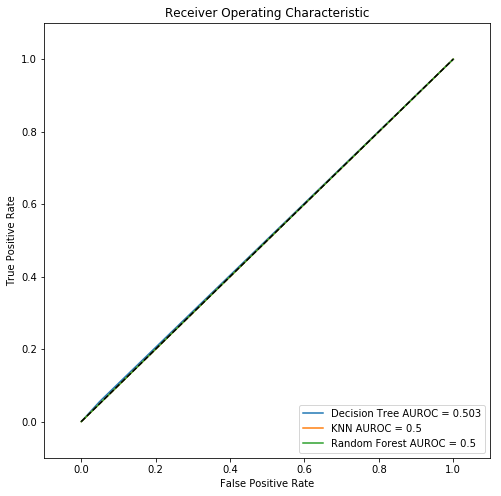

In [40]:
from sklearn.metrics import roc_curve, auc

# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')


# ---- DT---- #

# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, DTPred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Decision Tree', auroc))


# ---- KNN---- #

# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, KNN_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KNN', auroc))


# ---- Random Forest ---- #

# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_y_4)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Random Forest', auroc))



# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()